In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [185]:
df = pd.read_csv("/content/drive/MyDrive/AAME.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-03-17,0.00,4.05,3.85,3.85,3.213167,15000
1,1980-03-18,0.00,4.00,3.80,3.80,3.171437,10200
2,1980-03-19,0.00,4.05,3.85,3.85,3.213167,33500
3,1980-03-20,0.00,4.00,3.80,3.80,3.171437,8700
4,1980-03-21,0.00,3.95,3.75,3.75,3.129709,12700
...,...,...,...,...,...,...,...
10093,2020-03-26,2.29,2.29,2.08,2.28,2.280000,1600
10094,2020-03-27,2.25,2.25,2.21,2.25,2.250000,500
10095,2020-03-30,2.25,2.25,2.13,2.13,2.130000,400
10096,2020-03-31,2.11,2.11,2.11,2.11,2.110000,300


In [186]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [187]:
df.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [188]:
df.drop(columns=["Date", "Adj Close", "Volume"], inplace=True)

In [189]:
df

,Open,High,Low,Close
0,0.00,4.05,3.85,3.85
1,0.00,4.00,3.80,3.80
2,0.00,4.05,3.85,3.85
3,0.00,4.00,3.80,3.80
4,0.00,3.95,3.75,3.75
...,...,...,...,...
10093,2.29,2.29,2.08,2.28
10094,2.25,2.25,2.21,2.25
10095,2.25,2.25,2.13,2.13
10096,2.11,2.11,2.11,2.11


In [203]:
X = df.drop(columns=["Close"])
y = df["Open"] = df["Open"].replace(0.0, method='ffill')

<ipython-input-203-85c444c49832>:2: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  y = df["Open"] = df["Open"].replace(0.0, method='ffill')


In [204]:
scaler_X = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)

scaler_y = MinMaxScaler()
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

In [205]:
def make_sample(X, y, window):
    Xs, ys = [], []
    for i in range(len(X) - window):
        Xs.append(X[i:i+window])
        ys.append(y[i+window])
    return np.array(Xs), np.array(ys)

In [206]:
window = 10
X_seq, y_seq = make_sample(X_scaled, y_scaled, window)

In [207]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, shuffle=False)

In [208]:
model = Sequential()
model.add(LSTM(units=50, activation='tanh', input_shape=(window, X_train.shape[2])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0172 - val_loss: 1.2844e-04
Epoch 2/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0010 - val_loss: 1.0254e-04
Epoch 3/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0011 - val_loss: 2.5898e-04
Epoch 4/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0011 - val_loss: 9.9061e-05
Epoch 5/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 9.9026e-04 - val_loss: 9.9797e-05
Epoch 6/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 9.6461e-04 - val_loss: 1.0838e-04
Epoch 7/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.0011 - val_loss: 8.8008e-05
Epoch 8/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.0011 - val_loss: 8.8856e-05
Epoch 9/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 9.9149e-04 - val_loss: 1.5034e-04
Epoch 10/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0010 - val_loss: 1.5462e-04
Epoch 11/30
253/253 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0010 - val_loss: 9.1374e-05
Epo

In [209]:
y_pred = model.predict(X_test)
y_test_inv = scaler_y.inverse_transform(y_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

64/64 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [214]:
mse = mean_squared_error(y_test, y_pred)
print(f"테스트 MSE: {mse:.8f}")

테스트 MSE: 0.00006023


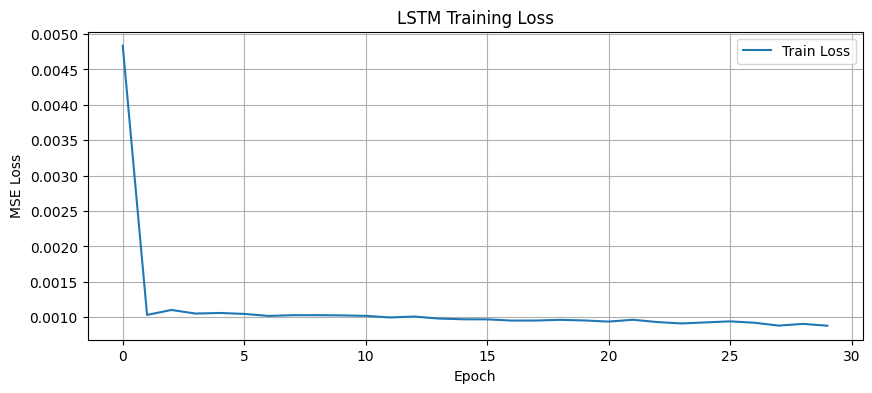

In [211]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.title('LSTM Training Loss')
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.legend()
plt.grid(True)
plt.show()

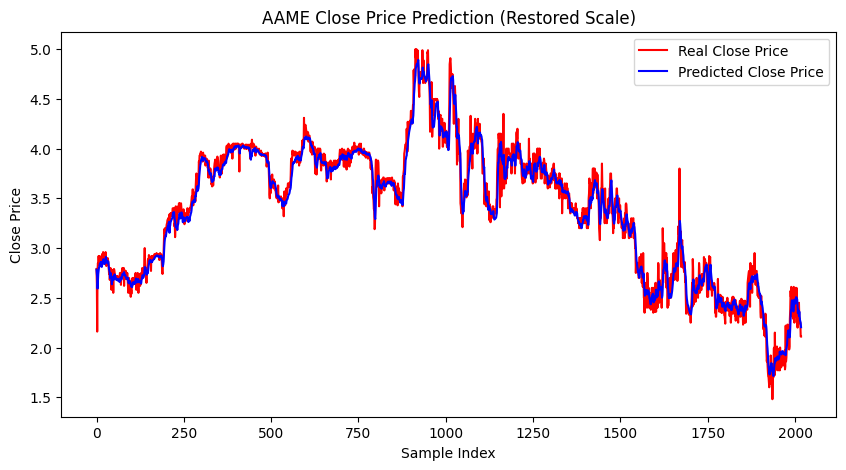

In [212]:
plt.figure(figsize=(10, 5))
plt.plot(y_test_inv, color='red', label='Real Close Price')
plt.plot(y_pred_inv, color='blue', label='Predicted Close Price')
plt.title('AAME Close Price Prediction (Restored Scale)')
plt.xlabel('Sample Index')
plt.ylabel('Close Price')
plt.legend()
plt.show()
